<a href="https://colab.research.google.com/github/jalexcanon/MujeresDigitales/blob/master/Taller_semana_5_(Judy_Alexandra_Ca%C3%B1%C3%B3n_Benavides).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Un fanático de pokemones le pide analizar los datos de pokemones, para esto se le proporciona un conjunto de datos en archivo csv. Este fanático le pide a usted como analista investigar cuales son los pokemones con mayor ataque.

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [52]:
df = pd.read_csv('pokemon_data.csv')

## Ejercicio 1:

Calcule el promedio y la mediana del ataque de: 
1. Todos los pokemones
2. Los pokemones agrupados por Legendary (es decir el promedio y mediana de pokemones legendarios y no legendarios)
3. Los pokemones agrupados por Type 1

In [53]:
attackP=df['Attack'].mean()
attackM=df['Attack'].median()
print("Ataque de todos los pokemones= media",attackP,"mediana",attackM)

Ataque de todos los pokemones= media 79.00125 mediana 75.0


In [4]:
legendarios=df.loc[df['Legendary'] == True]
promedio=legendarios['Attack'].mean()
mediana=legendarios['Attack'].median()
print("Legendarios = media", promedio,"mediana",mediana)
no_legendarios=df.loc[df['Legendary'] == False]
nol_promedio=no_legendarios['Attack'].mean()
nol_mediana=no_legendarios['Attack'].median()
print("No legendarios = media", nol_promedio,"mediana",nol_mediana)

Legendarios = media 116.67692307692307 mediana 110.0
No legendarios = media 75.66938775510204 mediana 72.0


In [54]:
tipo=df.groupby(['Type 1']).mean().sort_values(['Attack'])
tipo['Attack']

Type 1
Fairy        61.529412
Electric     69.090909
Bug          70.971014
Psychic      71.456140
Ice          72.750000
Grass        73.214286
Normal       73.469388
Ghost        73.781250
Water        74.151786
Poison       74.678571
Flying       78.750000
Fire         84.769231
Dark         88.387097
Steel        92.703704
Rock         92.863636
Ground       95.750000
Fighting     96.777778
Dragon      112.125000
Name: Attack, dtype: float64

In [55]:
tipo2=df.groupby(['Type 1']).median().sort_values(['Attack'])
tipo2['Attack']

Type 1
Fairy        52.0
Psychic      57.0
Bug          65.0
Electric     65.0
Ghost        66.0
Ice          67.0
Grass        70.0
Normal       70.5
Water        72.0
Poison       74.0
Fire         84.5
Flying       85.0
Ground       85.0
Dark         88.0
Steel        89.0
Rock         95.0
Fighting    100.0
Dragon      113.5
Name: Attack, dtype: float64

## Ejercicio 2:

Grafique el ataque de los pokemones con un grafico boxplot para los siguientes casos:
1. Todos los pokemones
2. Los pokemones agrupados por Legendary (es decir el promedio y mediana de pokemones legendarios y no legendarios)
3. Los pokemones agrupados por Type 1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


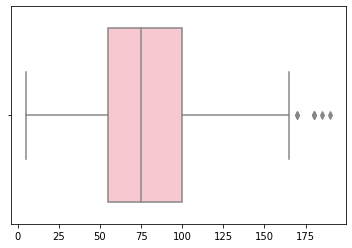

In [7]:
b_df = df['Attack'].values
sns.boxplot(b_df, color='pink')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



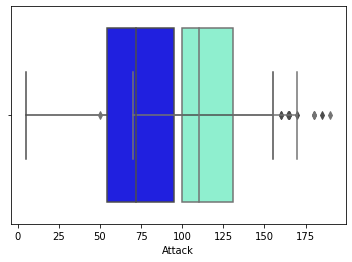

In [ ]:
legendarios=df.loc[df['Legendary'] == False]
legendarios2=df.loc[df['Legendary'] == True]
sns.boxplot(legendarios['Attack'], color='blue')
sns.boxplot(legendarios2['Attack'], color='aquamarine')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



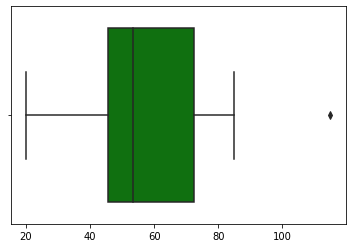

In [ ]:
tipo2=df.groupby('Type 1').first()
b_df2 = tipo2['Attack'].values
sns.boxplot(b_df2, color='green')

## Ejercicio 3:

Realice las siguientes pruebas de hipótesis:
1. El promedio del ataque de los pokemones es mayor a 77
2. El promedio del ataque de los pokemones legendarios es diferente a los no legendarios


Y determine con un nivel de significancia del 5% (es decir $\alpha$ = 0.05), si podemos rechazar o no las 3 hipótesis anteriores. 

**Hipótesis 1**
* $\mu$ promedio del ataque de los pokemones 79.00125.
* $ \mu_0$ 77

*Hipótesis nula:* 79.00125 < 77 

*Hipótesis alternativa:* 79.00125 > 77 



In [43]:
df['Attack'].mean()

79.00125

In [44]:
T,p = stats.ttest_1samp(df['Attack'], popmean=77)
p_value1=(p/2)
print(p_value1)

0.04077652822594917


In [49]:
alfa=0.05
def pruebat(pvalue):
  if pvalue <=alfa:
    print("Se rechaza H0, la diferencia observada es estadísticamente significativa")
  else:
    print("No se rechaza H0, la diferencia observada no es estadísticamente significativa")
pruebat(p_value1)

Se rechaza H0, la diferencia observada es estadísticamente significativa


**Respuesta hipótesis 1:** 
* El promedio del ataque de los pokemones es de 79.00125 y este valor es mayor a 77. 
* Al querer comparar si $ \mu $ > $\mu_0$ (79.000125>77) se concluye que el  $p$-value es menor que el valor que el de $\alpha$ (0.05), por ende, la diferencia es estadísticamente significativa, y no se debe retener la hipótesis nula de $ \mu $ < $\mu_0$


**Hipótesis 2**
* $\mu_1$ promedio del ataque de los pokemones 116.67692307692307 legendarios 
* $ \mu_2$ promedio del ataque de los pokemones no legendarios 75.66938775510204 

$$ H_0: \mu_1=\mu_2$$
$$H_a: \mu_1 \neq \mu_2$$

*Hipótesis nula:* 116.67692307692307 = 75.66938775510204  

*Hipótesis alternativa:* 116.67692307692307  ≠  75.66938775510204  

In [45]:
prueba=df[df.Legendary==True].Attack.describe()
prueba2=df[df.Legendary==False].Attack.describe()
print(prueba,prueba2)

count     65.000000
mean     116.676923
std       30.348037
min       50.000000
25%      100.000000
50%      110.000000
75%      131.000000
max      190.000000
Name: Attack, dtype: float64 count    735.000000
mean      75.669388
std       30.490153
min        5.000000
25%       54.500000
50%       72.000000
75%       95.000000
max      185.000000
Name: Attack, dtype: float64


In [35]:
prueba=df[df.Legendary==True].Attack
prueba2=df[df.Legendary==False].Attack

statistic, pvalue = stats.ttest_ind(prueba,prueba2,equal_var=False)
statistic, pvalue

(10.438133539322203, 2.520372449236646e-16)

In [50]:
alfa=0.05
def pruebat(pvalue):
  if pvalue <=alfa:
    print("Se rechaza H0, la diferencia observada es estadísticamente significativa")
  else:
    print("No se rechaza H0, la diferencia observada no es estadísticamente significativa")
pruebat(pvalue)

Se rechaza H0, la diferencia observada es estadísticamente significativa


**Respuesta hipótesis 2:**

*   El promedio de los pokemones legendarios es de 116.67692307692307, y este valor es diferente al promedio de los pokemones no legendarios que es de 75.66938775510204. Con una diferencia de 41.00753532182104.
*   Se rechaza la hipótesis nula pues el valor de $\mu_1$ no es igual al valor de $ \mu_2$. Lo cual se comprobo al vislumbrar que el $p$-value es menor que el valor que el de $\alpha$ (0.05), por ende, la diferencia es estadísticamente significativa, y no se debe retener la hipótesis nula de $\mu_1$ = $\mu_2$
